In [1]:
# basic real time algorithms

import time
import random
from collections import deque

In [12]:
# real time data stream yielding a data pt every 0.5 second

def data_stream():
    for i in range(100):
        val = random.randint(1, 10)
        yield val
        time.sleep(0.5)

stream = data_stream()

for _ in range(10):
    print(next(stream))

8
6
5
3
9
6
2
8
8
5


In [14]:
def real_time_average(window_size=5):
    window = deque(maxlen=window_size)
    stream = data_stream()
    for data in stream:
        window.append(data)
        avg = sum(window) / len(window)
        print(f"New Data: {data:3} | sliding avg last {window_size} values: {avg:.2f}")

real_time_average()

New Data:   7 | sliding avg last 5 values: 7.00
New Data:   7 | sliding avg last 5 values: 7.00
New Data:   1 | sliding avg last 5 values: 5.00
New Data:   7 | sliding avg last 5 values: 5.50
New Data:   1 | sliding avg last 5 values: 4.60
New Data:   2 | sliding avg last 5 values: 3.60
New Data:   6 | sliding avg last 5 values: 3.40
New Data:   5 | sliding avg last 5 values: 4.20
New Data:  10 | sliding avg last 5 values: 4.80
New Data:  10 | sliding avg last 5 values: 6.60
New Data:  10 | sliding avg last 5 values: 8.20
New Data:   9 | sliding avg last 5 values: 8.80
New Data:  10 | sliding avg last 5 values: 9.80
New Data:   2 | sliding avg last 5 values: 8.20
New Data:   6 | sliding avg last 5 values: 7.40
New Data:   4 | sliding avg last 5 values: 6.20
New Data:   1 | sliding avg last 5 values: 4.60
New Data:   2 | sliding avg last 5 values: 3.00
New Data:   7 | sliding avg last 5 values: 4.00
New Data:   2 | sliding avg last 5 values: 3.20
New Data:   2 | sliding avg last 5 value

In [16]:
def alert(threshold=8, window_size=5):
    window = deque(maxlen=window_size)
    stream = data_stream()

    for data in stream:
        window.append(data)
        avg = sum(window) / len(window)
        alert = "### [ALERT]" if data > threshold else ""
        print(f"New Data: {data:3} | sliding avg: {avg:3.2f} {alert}")

alert() 

New Data:   3 | sliding avg: 3.00 
New Data:   9 | sliding avg: 6.00 ### [ALERT]
New Data:   9 | sliding avg: 7.00 ### [ALERT]
New Data:  10 | sliding avg: 7.75 ### [ALERT]
New Data:   2 | sliding avg: 6.60 
New Data:   8 | sliding avg: 7.60 
New Data:   7 | sliding avg: 7.20 
New Data:   4 | sliding avg: 6.20 
New Data:   8 | sliding avg: 5.80 
New Data:   4 | sliding avg: 6.20 
New Data:  10 | sliding avg: 6.60 ### [ALERT]
New Data:   1 | sliding avg: 5.40 
New Data:   1 | sliding avg: 4.80 
New Data:   1 | sliding avg: 3.40 
New Data:   2 | sliding avg: 3.00 
New Data:   9 | sliding avg: 2.80 ### [ALERT]
New Data:   8 | sliding avg: 4.20 
New Data:   2 | sliding avg: 4.40 
New Data:   8 | sliding avg: 5.80 
New Data:   5 | sliding avg: 6.40 
New Data:   3 | sliding avg: 5.20 
New Data:   6 | sliding avg: 4.80 
New Data:   7 | sliding avg: 5.80 
New Data:   9 | sliding avg: 6.00 ### [ALERT]
New Data:  10 | sliding avg: 7.00 ### [ALERT]
New Data:   3 | sliding avg: 7.00 
New Data:   7

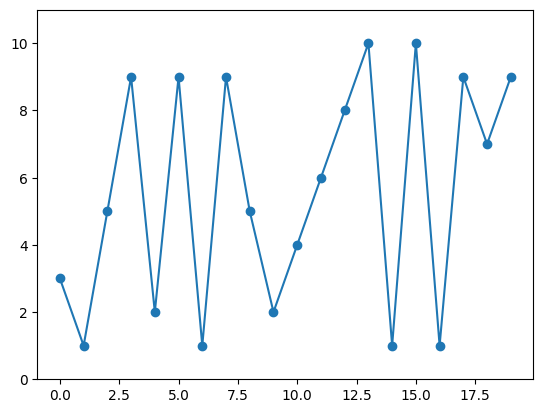

In [21]:
from IPython.display import clear_output
import matplotlib.pyplot as plt

def plot(window_size=20):
    window = deque(maxlen=window_size)
    stream = data_stream()  
    for data in stream:
        window.append(data)
        clear_output(wait=True)
        plt.plot(list(window), marker="o", linestyle="-")
        plt.ylim(0, 11)
        plt.pause(0.01)

plot()